##Importing libraries


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#reading the dataframe
db = pd.read_csv('netflix_titles.csv')

##Observing the data

In [ ]:
db.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
db.shape

(8807, 12)

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   Date          8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##Changing the date and time format

In [ ]:
db.rename(columns={'date_added':'Date'},inplace=True)

In [ ]:
db.head()

,show_id,type,title,director,cast,country,Date,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
db['Date'] = pd.to_datetime(db['Date'], format='mixed')

## Checking for null values

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   Date          8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
db.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
Date              10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#fill NaN with 'Not Given'
db = db.fillna({'director':'Not Given',
                 'cast':'Not Given',
                 'country':'Not Given',
                 })

#fill the missing date with mean of the column
db = db.fillna(value=db['Date'].mean())

#fill the missing rating and duration values with interpolate()
db['rating'] = db['rating'].interpolate(method='linear')
db['duration'] = db['duration'].interpolate(method='linear')

In [ ]:
db.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
Date            0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

filled all null values


##Checking for duplicates

In [ ]:
db.duplicated().sum()

0

 no duplicates in the dataframe

##Data Visualisation

In [ ]:
#importing required library
import matplotlib.pyplot as plt

####1)Content type in percentage

<Axes: ylabel='count'>

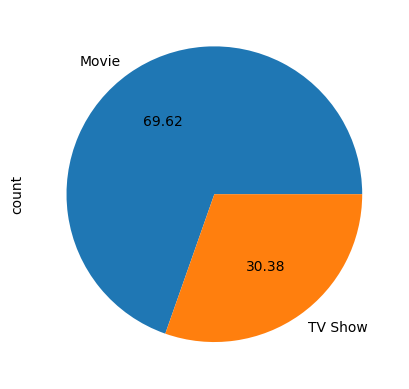

In [ ]:
pd.value_counts(db['type']).plot.pie(
     autopct="%.2f"
)

####2) Movie and TV show by country

<Axes: xlabel='country'>

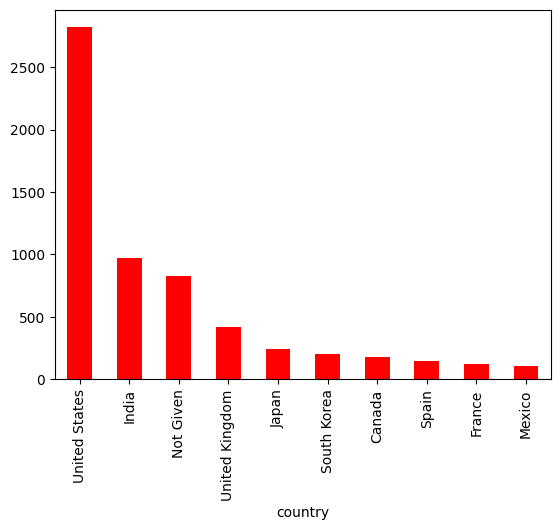

In [ ]:
db.sort_values('country', ascending=False).value_counts('country').head(10).plot(kind='bar', stacked=True, color='red')

<Axes: xlabel='country'>

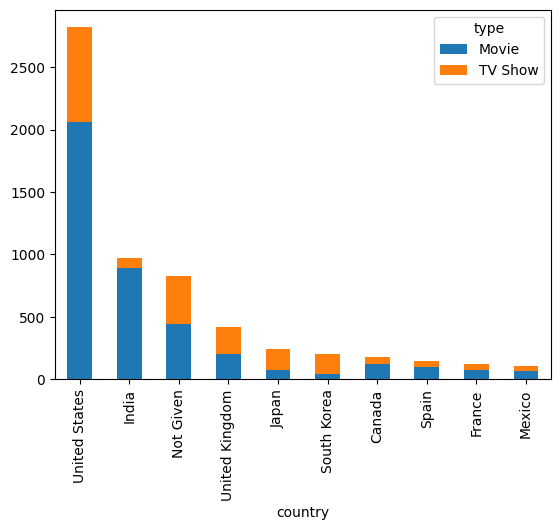

In [ ]:
grouped = db.groupby(['country', 'type']).size().unstack(fill_value=0)
grouped['Total'] = grouped.sum(axis=1)
grouped = grouped.sort_values(by='Total', ascending=False).drop(columns='Total')
grouped.head(10).plot(kind='bar', stacked=True)

####3)Number of contents added through the year

Date
2008-01-01     1
2008-02-04     1
2009-05-05     1
2009-11-18     1
2010-11-01     1
              ..
2021-09-21     5
2021-09-22     9
2021-09-23     2
2021-09-24    10
2021-09-25     1
Length: 1715, dtype: int64


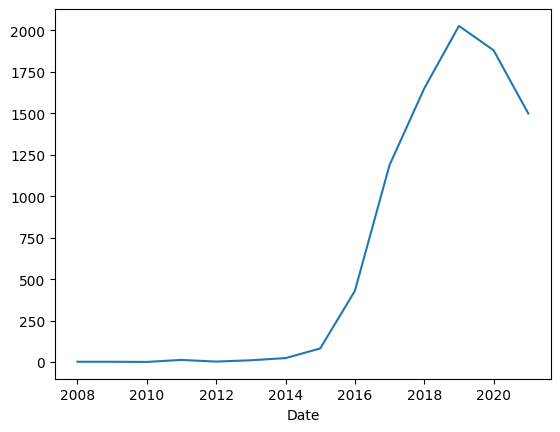

In [ ]:
db2 = db.sort_values(by='Date',ascending=True).groupby(db.Date.dt.year).size().plot()
db2
print(db.sort_values(by='Date',ascending=True).groupby('Date').size())



####4) Top Directors

<Axes: ylabel='director'>

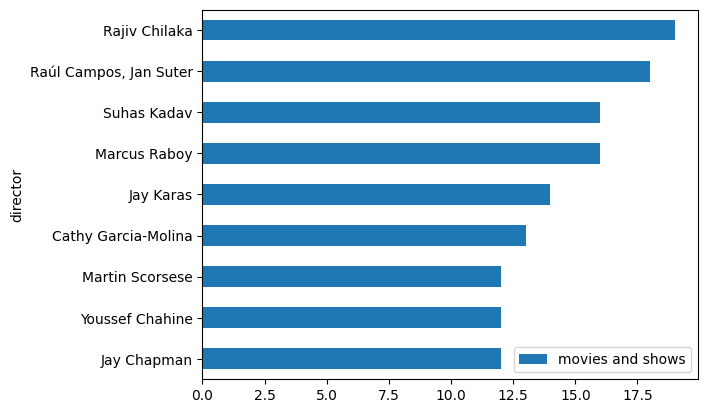

In [ ]:
db3 = db.groupby('director').size().to_frame(name="movies and shows").reset_index().sort_values(by='movies and shows', ascending=True).tail(10)
db3 = db3[db3.director != 'Not Given']
db3.plot(x='director', y='movies and shows', kind='barh')

####5) Top Genres

<Axes: ylabel='listed_in'>

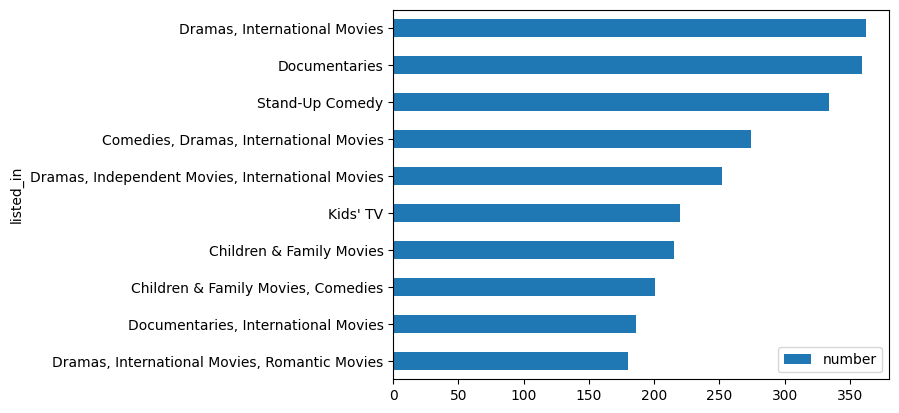

In [ ]:
db4 = db.groupby('listed_in').size().to_frame(name="number").reset_index().sort_values(by='number', ascending=True).tail(10)
db4 = db4[db4.listed_in != 'Not Given']
db4.plot(x='listed_in', y='number', kind='barh')

####6) Top Rating

<Axes: ylabel='rating'>

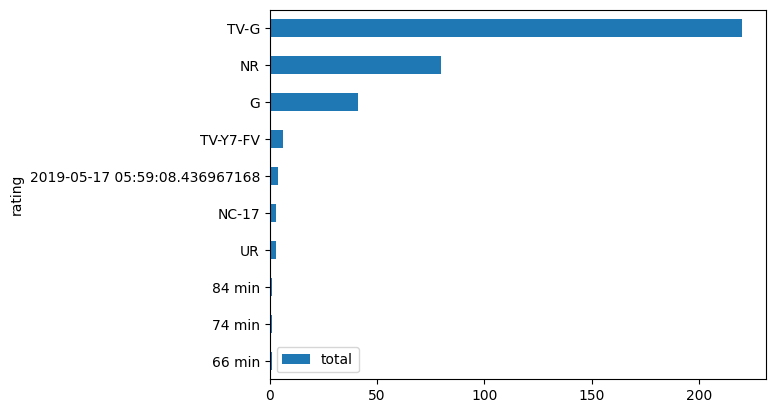

In [ ]:
db5 = db.groupby('rating').size().to_frame(name="total").reset_index().sort_values(by='total', ascending=True).head(10)
db5 = db5[db5.rating != 'Not Given']
db5.plot(x='rating', y='total', kind='barh')

####7) Oldest Contents on Netflix by Content Release year

In [ ]:
db6 = db.sort_values('release_year').head(10)
db6 = db6[["title", "release_year"]]
db6.reset_index(drop=True, inplace=True)
db6

,title,release_year
0,Pioneers: First Women Filmmakers*,1925
1,Prelude to War,1942
2,The Battle of Midway,1942
3,Undercover: How to Operate Behind Enemy Lines,1943
4,Why We Fight: The Battle of Russia,1943
5,WWII: Report from the Aleutians,1943
6,Tunisian Victory,1944
7,The Negro Soldier,1944
8,The Memphis Belle: A Story of a\nFlying Fortress,1944
9,San Pietro,1945


####8) Content Types over the Years

<Axes: xlabel='Date'>

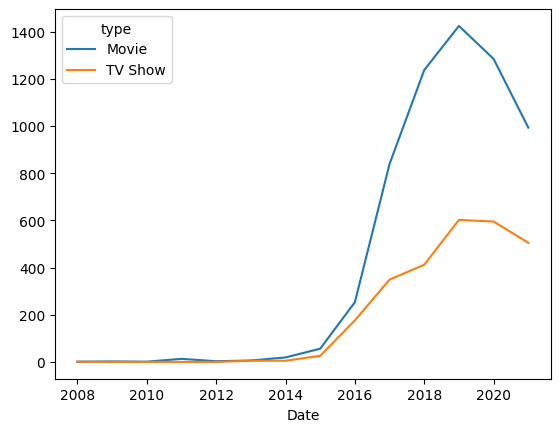

In [ ]:
db7 = db.sort_values("Date").groupby([db.Date.dt.year,'type']).size().unstack(fill_value=0)

db7.plot()


####9) Release Years with Highest Contents

(array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]),
 [Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021')])

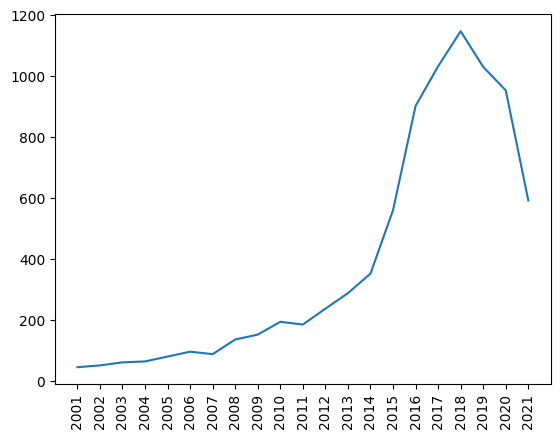

In [ ]:
db8 = db.sort_values("release_year").groupby(['release_year']).size().to_frame(name="value").reset_index()
db8 = db8[db8['release_year']>2000]
plt.plot(db8['release_year'], db8['value'])
plt.xticks(list((db8['release_year'])))
plt.xticks(rotation=90)